# Distribution of urban green spaces in New York City

**Student ID:** 200025694

#### Disclaimer
In submitting this assignment I hereby confirm that:

I have read the University's statement on Good Academic Practice; that the following work is my own work; and that significant academic debts and borrowings have been properly acknowledged and referenced.
 

#### How to reproduce the code
The repository contains all the data required to run the code and the code within the notebook already contains the pathways to load the relevant data, including API tokens where APIs are used to load data.

## Introduction
Urban green spaces have been documented to have a number of positive impacts on neighbourhoods in which they are located, including for example residents’ physical and mental health, improved environmental conditions as well as economic benefits, as they drive the value of surrounding real estate (Jung, 2023). This research project will analyse how green spaces are distributed across diverse neighbourhoods in New York City, using a combination of spatial data and population survey data. It will attempt to answer the question of whether abundance and quality of green spaces varies across neighbourhoods depending on their socio-economic characteristics, such as ethnicity or income level. Such analysis has the potential to help identify park-rich and park-deprived neighbourhoods (Jung, 2023) and inform local planning strategies aimed at improving green space provision in the city based on specific needs of different types of neighbourhoods.

## Context
Urban green spaces provide numerous benefits to the local communities. The benefits range from improved environmental conditions, such as biodiversity, improved air quality, or lower ambient temperatures, to aesthetic, cultural and recreational opportunities as well as higher real estate value (Jung, 2023). A recent 10-year longitudinal study in Wales has found that greater exposure to ambient greenness lowers the likelihood of common mental health disorders. This relationship could potentially be explained by the fact that green spaces provide more opportunities for social contact, reduce stress and depression symptoms, encourage higher levels of physical activity and improve air quality (Geary et al., 2023).
Despite their documented importance for health and wellbeing, environmental justice studies across many different urban areas have revealed unequal access to green spaces based on socio-economic and demographic characteristics. In particular, vulnerable communities such as ethnic minorities, women, elderly and low-income residents have worse access to good-quality green spaces than other neighbourhoods, resulting in negative physical and mental health outcomes, and deprivation (Jung, 2023). 

 
Jung (2023) has conducted a probabilistic classification of neighbourhood typologies in New York City based on socio-economic variables and green space provision indices. Green space provision was evaluated based on park proximity measured from each census tract centroid and park acreage, while socio-economic and demographic variables included data such as age, ethnicity, education level or income. The study also considered the wider housing provision context by taking into account the effects of house value, rent and percentage of subsidised housing on the availability of green spaces in different neighbourhoods. It identified 6 neighbourhood types based on their socio-economic characteristics and access to green spaces (see Fig. 1). The most notable is the difference between predominantly white, affluent neighbourhoods, which have the highest park acreage per population, and the predominantly Black and Hispanic neighbourhoods with low park acreage and proximity. 


![Figure 1](fig1.png)

However, as several studies note, geographical accessibility is not the only, nor the most important measure when evaluating green space distribution. While some lower-income neighbourhoods may live close to green spaces, the acreage and quality of these spaces is lower (Jung, 2023; Mustafa et al., 2023; Phillips et al., 2023). This issue was especially relevant during the Covid-19 pandemic when the utilisation of green spaces increased due to its strengthened importance for health and wellbeing and rising concerns of overcrowding of smaller green areas led people to seek bigger, higher-quality parks (Mustafa et al., 2023).


In this context, the study of Mustafa et al. (2023) urge us to consider three types of access: real, geographic and perceived access. Real access refers to the ease of access, which is linked to the availability of transport, travel time and individual capabilities and opportunities of each individual. Geographic access is a quantitative measure which considers variables such as distance, transport network and other spatial patterns. Lastly, perceived access is influenced by people’s personal beliefs, attitudes and past experiences. Phillips et al. (2023) also note the limitations of current, predominantly quantitative measures as these do not reflect people’s preferences and willingness to actually travel to particular locations. They critique the lack of qualitative measures in such studies and highlight the importance of incorporating perceived accessibility and perceived quality indicators. They conduct a quality-accessibility analysis of green spaces in Brussels based on user perception, using a public participation GIS survey. The benefits of this approach are that it helps to identify specific factors that attract people to particular green spaces, which can help to tailor planning strategies to better respond to needs and demands of specific neighbourhoods.


## Study Area & Data
This study examines the area of New York City, USA. The New York City Department of Parks and Recreation manages over 30,000 acres of land, including over 1,700 parks. They look after 666,000 street trees and 5 million park trees. 
This study was conducted at the level of Neighbourhood Tabulation Areas (NTAs), which are medium-sized geographies for reporting statistics from Decennial Census and American Community Survey (ACS) with average population of about 45,000. This level has been chosen due to the lack of more granular, census tract level data with the desired variables.
The following datasets were used in this study and are included in this repository:


-	[Neighbourhood Tabulation Areas boundaries]( https://data.cityofnewyork.us/City-Government/2020-Neighborhood-Tabulation-Areas-NTAs-Tabular/9nt8-h7nd/about_data) – 2020_NTAs.csv
-	[2021 ACS 5-year estimates for Demographic, Social and Economic variables on NTA level]( https://www.nyc.gov/site/planning/planning-level/nyc-population/american-community-survey.page.page) – NTA_demo.xlsx, NTA_soc.xlsx, NTA_econ.xlsx
-	[Record of Forestry Tree Points for NYC Parks & Recreation]( https://data.cityofnewyork.us/Environment/Forestry-Tree-Points/hn5i-inap/about_datPI
-	[Parks Properties managed by NYC Parks]( https://data.cityofnewyork.us/Recreation/Parks-Properties/enfh-gkve/about_data) – Parks_Properties.csv


## Methods

The above datasets were loaded and analysed in Jupyter Notebook. The variables were manipulated primarily using Python libraries Pandas and Geopandas. Firstly, variables relevant for the analysis were subset.  The social and demographic variables from ACS for each NTA were recalculated as percentages of the total population of given NTA for better data comparability.   The different datasets were merged using the unique GeoID of each NTA. The Parks Properties dataset was converted to a geodataframe and the intersection of park and NTA boundaries was obtained using the gpd.overlay function. This allowed for the calculation of park area per each NTA as a percentage of total area as well as per capita, for which the size of parks was converted from acres to square metres to match the units of the NTA dataset. Finally, the Forestry Tree Points dataset was loaded from the NYC Open Data website API and converted to a geodataframe. Rows with missing values for geometry and condition were removed and subsequently a spatial join with the NTA boundaries was performed using the point in polygon method, which assigned the attributes of a given polygon to each point found within it. This allowed for calculation of statistics of tree point numbers and condition in each NTA. The categorical condition variable, recorded in the form of string as Excellent, Good, Poor, etc., was converted into a quantitative variable, calculated as percentage of trees in a particular condition out of all trees in a given NTA. For this purpose, two variables were calculated – tp_good_perc (percentage of trees in Excellent or Good condition) and tp_poor_perc (percentage of trees in Poor, Critical or Dead condition).

The subset variables from the four original datasets and the newly calculated variables were all merged into one final dataframe using the GeoID attribute, representing the unique code of each NTA, which was common for all datasets. Correlation matrix was then calculated and visualised to determine relationships between selected variables. The Spearman correlation method was selected for this purpose, as the data did not exhibit normal distribution, not linear relationships between variables.
The final variables used for correlation analysis are as follows:


-	*MdHHIncE* – median household income
-	*Hsp_perc* – percentage of population of Hispanic ethnicity
-	*White_perc* – percentage of White population
-	*Asian_perc* – percentage of Asian populaiton
-	*Disab_perc* – percentage of disabled population
-	*Trees_byArea* – number of trees divided by the NTA area
-	*Tp_good_perc* – percentage of trees in Excellent or Good condition out of all trees
-	*Tp_poor_perc* - percentage of trees in Poor, Critical or Dead condition out of all trees
-	*Area_per_person* – size of park area in square metres available divided by total population
-	*Park_area_perc* – park area divided by NTA area


There are several limitations to this methodology. Firstly, the granularity of the data is quite low.  The analysis is done at the level of NTAs, which contain an average population of 45,000. This level was chosen due to the difficulty of obtaining desired data on the more granular, census tract level. Secondly, the availability of accurate datasets with complete and reliable data on distribution of green spaces was limited. The datasets that were used – the Parks Properties and the Forestry Tree Points – have gaps in their accuracy. For example, the Forestry Tree Points dataset does not contain the full inventory of all park and street trees in NYC and therefore provides an incomplete insight into tree distribution. The Park Properties dataset contains information on different types of natural recreation properties, from beaches through tree-lined avenues to parks, but does not take into account the extent to which different properties are “green” or forested. It is therefore only a proxy metric in determining distribution of green spaces. In line with the critique of Phillips et al. (2023), another limitation of this approach is also the focus only on quantitative data and proxies and lack of consideration for qualitative factors, in particular the residents perception of green space access.

## Code

### Data pre-processing

In [1]:
# import packages

import pandas as pd
import geopandas as gpd

In [2]:
# import data from folder

nta = pd.read_csv("Data/2020_NTAs.csv")

dem = pd.read_excel("Data/NTA_demo.xlsx")

soc = pd.read_excel("Data/NTA_soc.xlsx")

econ = pd.read_excel("Data/NTA_econ.xlsx")

In [3]:
# subset NTA information

subset_NTA = nta[["the_geom", "NTA2020", "NTAName", "Shape_Area"]]

# rename columns

subset_NTA = subset_NTA.rename(columns = {"the_geom" : "geometry", "NTA2020": "GeoID"})

subset_NTA.head()

,geometry,GeoID,NTAName,Shape_Area
0,MULTIPOLYGON (((-73.93213397515774 40.72815960...,BK0101,Greenpoint,3.532121e+07
1,MULTIPOLYGON (((-73.96176070350778 40.72522879...,BK0102,Williamsburg,2.885431e+07
2,MULTIPOLYGON (((-73.95023693757913 40.70547324...,BK0103,South Williamsburg,1.520896e+07
3,MULTIPOLYGON (((-73.92405909736993 40.71411156...,BK0104,East Williamsburg,5.226621e+07
4,MULTIPOLYGON (((-73.9923636697722 40.689690123...,BK0201,Brooklyn Heights,9.982322e+06


In [4]:
# subset demographic attributes

subset_dem = dem[["GeoID", "Pop_1E", "Hsp1E", "WtNHE", "BlNHE", "AsnNHE"]]

subset_dem.head()

,GeoID,Pop_1E,Hsp1E,WtNHE,BlNHE,AsnNHE
0,BK0101,37518,5498,27273,937,1464
1,BK0102,63316,18908,34827,1395,4905
2,BK0103,47065,3957,40619,1571,237
3,BK0104,53478,20099,20302,6439,4865
4,BK0201,24775,1722,18465,1337,1846


In [5]:
# subset social attributes

subset_soc = soc[["GeoID", "CvNIDE"]]

subset_soc.head()

,GeoID,CvNIDE
0,BK0101,2610
1,BK0102,4531
2,BK0103,3324
3,BK0104,6926
4,BK0201,1977


In [6]:
# subset economic attributes

subset_econ = econ[["GeoID", "MdHHIncE"]]

subset_econ.head()

,GeoID,MdHHIncE
0,BK0101,111887.0
1,BK0102,120986.0
2,BK0103,32704.0
3,BK0104,66540.0
4,BK0201,171607.0


In [7]:
from functools import reduce

#define list of DataFrames
dfs = [subset_NTA, subset_dem, subset_soc, subset_econ]

#merge all DataFrames into one
merged = reduce(lambda  left,right: pd.merge(left,right,on=['GeoID'],
                                            how='outer'), dfs)

merged.head()

,geometry,GeoID,NTAName,Shape_Area,Pop_1E,Hsp1E,WtNHE,BlNHE,AsnNHE,CvNIDE,MdHHIncE
0,MULTIPOLYGON (((-73.93213397515774 40.72815960...,BK0101,Greenpoint,3.532121e+07,37518,5498,27273,937,1464,2610,111887.0
1,MULTIPOLYGON (((-73.96176070350778 40.72522879...,BK0102,Williamsburg,2.885431e+07,63316,18908,34827,1395,4905,4531,120986.0
2,MULTIPOLYGON (((-73.95023693757913 40.70547324...,BK0103,South Williamsburg,1.520896e+07,47065,3957,40619,1571,237,3324,32704.0
3,MULTIPOLYGON (((-73.92405909736993 40.71411156...,BK0104,East Williamsburg,5.226621e+07,53478,20099,20302,6439,4865,6926,66540.0
4,MULTIPOLYGON (((-73.9923636697722 40.689690123...,BK0201,Brooklyn Heights,9.982322e+06,24775,1722,18465,1337,1846,1977,171607.0


In [8]:
# calculate percentages for demographic variables out of total population

merged["Hsp_perc"] = (merged["Hsp1E"] / merged["Pop_1E"])
merged["White_perc"] = (merged["WtNHE"] / merged["Pop_1E"])
merged["Black_perc"] = (merged["BlNHE"] / merged["Pop_1E"])
merged["Asian_perc"] = (merged["AsnNHE"] / merged["Pop_1E"])
merged["Disab_perc"] = (merged["CvNIDE"] / merged["Pop_1E"])

# drop columns with totals
merged = merged.drop(["Hsp1E","WtNHE","BlNHE", "AsnNHE", "CvNIDE"], axis=1)

merged.head()

,geometry,GeoID,NTAName,Shape_Area,Pop_1E,MdHHIncE,Hsp_perc,White_perc,Black_perc,Asian_perc,Disab_perc
0,MULTIPOLYGON (((-73.93213397515774 40.72815960...,BK0101,Greenpoint,3.532121e+07,37518,111887.0,0.146543,0.726931,0.024975,0.039021,0.069567
1,MULTIPOLYGON (((-73.96176070350778 40.72522879...,BK0102,Williamsburg,2.885431e+07,63316,120986.0,0.298629,0.550051,0.022032,0.077469,0.071562
2,MULTIPOLYGON (((-73.95023693757913 40.70547324...,BK0103,South Williamsburg,1.520896e+07,47065,32704.0,0.084075,0.863040,0.033379,0.005036,0.070626
3,MULTIPOLYGON (((-73.92405909736993 40.71411156...,BK0104,East Williamsburg,5.226621e+07,53478,66540.0,0.375837,0.379633,0.120405,0.090972,0.129511
4,MULTIPOLYGON (((-73.9923636697722 40.689690123...,BK0201,Brooklyn Heights,9.982322e+06,24775,171607.0,0.069506,0.745308,0.053966,0.074511,0.079798


In [9]:
# convert to geodataframe

from shapely import wkt

merged["geometry"] = gpd.GeoSeries.from_wkt(merged["geometry"])

merged_gdf = gpd.GeoDataFrame(merged, geometry = "geometry", crs = "EPSG:4326")

<Axes: >

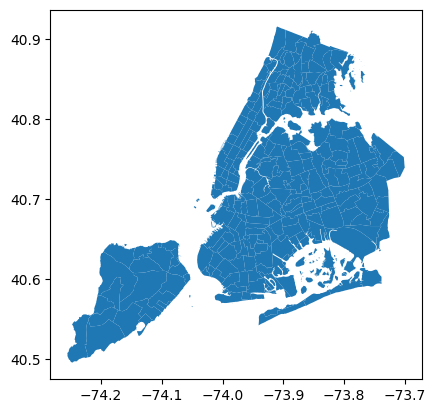

In [10]:
merged_gdf.plot()

In [11]:
# load and subset Parks Properties data

parks = pd.read_csv("Parks_Properties.csv")
parks = parks[["OBJECTID", "CLASS", "ACRES", "multipolygon"]]
parks = parks[(parks["CLASS"] == "PARK")]
parks.head()

,OBJECTID,CLASS,ACRES,multipolygon
0,6344,PARK,9.375,MULTIPOLYGON (((-73.82218300936414 40.59892072...
1,15508,PARK,249.389,MULTIPOLYGON (((-73.8587476480729 40.767414466...
2,6293,PARK,2.035,MULTIPOLYGON (((-73.72738293199147 40.75605209...
3,69228,PARK,63.636,MULTIPOLYGON (((-73.96628815209517 40.67255002...
4,69239,PARK,326.895,MULTIPOLYGON (((-73.77672197953444 40.78816377...


In [12]:
# convert to geodataframe

from shapely import wkt

parks["geometry"] = gpd.GeoSeries.from_wkt(parks["multipolygon"])
parks_gdf = gpd.GeoDataFrame(parks, geometry="geometry", crs = "EPSG:4326")

<Axes: >

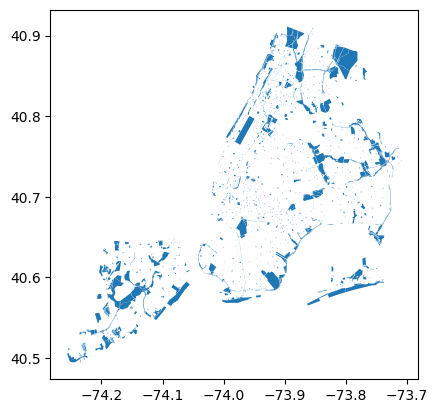

In [13]:
parks_gdf.plot()

In [14]:
# calculate parks and NTAs intersection

park_overlay = gpd.overlay(merged_gdf, parks_gdf, how='intersection')
park_overlay.head()

,GeoID,NTAName,Shape_Area,Pop_1E,MdHHIncE,Hsp_perc,White_perc,Black_perc,Asian_perc,Disab_perc,OBJECTID,CLASS,ACRES,multipolygon,geometry
0,BK0101,Greenpoint,35321206.58,37518,111887.0,0.146543,0.726931,0.024975,0.039021,0.069567,52782,PARK,2.650,MULTIPOLYGON (((-73.96161914433519 40.73202363...,"POLYGON ((-73.96199 40.73226, -73.96184 40.732..."
1,BK0101,Greenpoint,35321206.58,37518,111887.0,0.146543,0.726931,0.024975,0.039021,0.069567,5029,PARK,0.896,MULTIPOLYGON (((-73.95749594420685 40.72852976...,"POLYGON ((-73.95820 40.72847, -73.95828 40.729..."
2,BK0101,Greenpoint,35321206.58,37518,111887.0,0.146543,0.726931,0.024975,0.039021,0.069567,5400,PARK,0.040,MULTIPOLYGON (((-73.95759297011574 40.72756678...,"POLYGON ((-73.95733 40.72759, -73.95732 40.727..."
3,BK0101,Greenpoint,35321206.58,37518,111887.0,0.146543,0.726931,0.024975,0.039021,0.069567,5463,PARK,9.134,MULTIPOLYGON (((-73.9423351968039 40.723351667...,"POLYGON ((-73.94398 40.72319, -73.94437 40.725..."
4,BK0101,Greenpoint,35321206.58,37518,111887.0,0.146543,0.726931,0.024975,0.039021,0.069567,5434,PARK,0.005,MULTIPOLYGON (((-73.94188146679365 40.72182905...,"POLYGON ((-73.94189 40.72188, -73.94180 40.721..."


In [15]:
# calculate park acreage per NTA

park_NTA = park_overlay.groupby(["GeoID"])["ACRES"].sum()
park_NTA.to_frame()

,ACRES
GeoID,
BK0101,67.340
BK0102,86.065
BK0103,12.178
BK0104,18.192
BK0201,28.872
...,...
SI0305,480.653
SI0391,1040.581
SI9561,658.288


In [16]:
# merge with NTA geodataframe

merged_gdf = merged_gdf.merge(park_NTA, on='GeoID')
merged_gdf.head()

,geometry,GeoID,NTAName,Shape_Area,Pop_1E,MdHHIncE,Hsp_perc,White_perc,Black_perc,Asian_perc,Disab_perc,ACRES
0,"MULTIPOLYGON (((-73.93213 40.72816, -73.93238 ...",BK0101,Greenpoint,3.532121e+07,37518,111887.0,0.146543,0.726931,0.024975,0.039021,0.069567,67.340
1,"MULTIPOLYGON (((-73.96176 40.72523, -73.96154 ...",BK0102,Williamsburg,2.885431e+07,63316,120986.0,0.298629,0.550051,0.022032,0.077469,0.071562,86.065
2,"MULTIPOLYGON (((-73.95024 40.70547, -73.94984 ...",BK0103,South Williamsburg,1.520896e+07,47065,32704.0,0.084075,0.863040,0.033379,0.005036,0.070626,12.178
3,"MULTIPOLYGON (((-73.92406 40.71411, -73.92404 ...",BK0104,East Williamsburg,5.226621e+07,53478,66540.0,0.375837,0.379633,0.120405,0.090972,0.129511,18.192
4,"MULTIPOLYGON (((-73.99236 40.68969, -73.99436 ...",BK0201,Brooklyn Heights,9.982322e+06,24775,171607.0,0.069506,0.745308,0.053966,0.074511,0.079798,28.872


In [17]:
# rename column and convert park area from acres to square metres

merged_gdf = merged_gdf.rename(columns = {"ACRES" : "park_area"})
merged_gdf["park_area"] = (merged_gdf["park_area"] * 4047)
merged_gdf.head()

,geometry,GeoID,NTAName,Shape_Area,Pop_1E,MdHHIncE,Hsp_perc,White_perc,Black_perc,Asian_perc,Disab_perc,park_area
0,"MULTIPOLYGON (((-73.93213 40.72816, -73.93238 ...",BK0101,Greenpoint,3.532121e+07,37518,111887.0,0.146543,0.726931,0.024975,0.039021,0.069567,272524.980
1,"MULTIPOLYGON (((-73.96176 40.72523, -73.96154 ...",BK0102,Williamsburg,2.885431e+07,63316,120986.0,0.298629,0.550051,0.022032,0.077469,0.071562,348305.055
2,"MULTIPOLYGON (((-73.95024 40.70547, -73.94984 ...",BK0103,South Williamsburg,1.520896e+07,47065,32704.0,0.084075,0.863040,0.033379,0.005036,0.070626,49284.366
3,"MULTIPOLYGON (((-73.92406 40.71411, -73.92404 ...",BK0104,East Williamsburg,5.226621e+07,53478,66540.0,0.375837,0.379633,0.120405,0.090972,0.129511,73623.024
4,"MULTIPOLYGON (((-73.99236 40.68969, -73.99436 ...",BK0201,Brooklyn Heights,9.982322e+06,24775,171607.0,0.069506,0.745308,0.053966,0.074511,0.079798,116844.984


Data pre-processing - Tree point data

In [18]:
# import relevant libraries

import requests
import pandas as pd
import geopandas as gpd
from sodapy import Socrata
import matplotlib.pyplot as plt

In [19]:
# getting the data from the API, using a token

client = Socrata("data.cityofnewyork.us",
                "ZgLRDvrVZFrqMyML66xV1J3wZ",
                username="kk232@st-andrews.ac.uk",
                password="Udaje123")

url_trees = client.get("hn5i-inap", limit = 2000000)

# converting into a pandas dataframe
trees_df = pd.DataFrame.from_records(url_trees)

In [20]:
# checking the structure of the data by displaying head

trees_df.head()

,objectid,dbh,tpstructure,tpcondition,plantingspaceglobalid,geometry,globalid,genusspecies,createddate,updateddate,location,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,riskrating,riskratingdate,planteddate,stumpdiameter
0,86823,20,Full,Excellent,E814CD37-9F53-4D79-AF86-3B454F9D29B9,POINT (-73.8165687459639202 40.7162906546850749),2B457A4C-E0E4-4E17-81C4-A5449F51C804,Acer nigrum - black maple,2015-02-28 05:00:00.0000000,2016-10-20 17:43:53.0000000,"{'type': 'Point', 'coordinates': [-73.81656874...",24670,25,3,24,65,NaN,NaN,NaN,NaN
1,87623,10,Retired,Good,A644AB79-A3CB-4F7F-923B-F308E615CCD4,POINT (-73.9384803613519495 40.8129927791458300),37195E1A-A7EE-4AA4-8389-19A0ED5C46F7,Fraxinus pennsylvanica - Green ash,2015-03-03 05:00:00.0000000,2019-09-18 13:12:55.0000000,"{'type': 'Point', 'coordinates': [-73.93848036...",13095,18,4,36,20,NaN,NaN,NaN,NaN
2,88023,24,Retired,Poor,21431016-EDB8-4A0B-B122-673125800C87,POINT (-73.8324418090213044 40.8876250431554311),6BA8E72B-1901-4EF3-ABFF-D11680AB4A9B,Acer platanoides - Norway maple,2015-03-03 05:00:00.0000000,2018-03-27 14:00:42.0000000,"{'type': 'Point', 'coordinates': [-73.83244180...",11275,29,5,2,30,NaN,NaN,NaN,NaN
3,88823,10,Full,Good,96FB6C55-612F-466D-9449-85A3CD2178E1,POINT (-74.2090363523908820 40.5195778140891463),79A5DBAF-F305-4DA1-A4B1-7A8C8D085435,Pyrus calleryana - Callery pear,2015-03-04 05:00:00.0000000,2016-10-12 15:13:11.0000000,"{'type': 'Point', 'coordinates': [-74.20903635...",10696,15,1,9,77,NaN,NaN,NaN,NaN
4,88824,10,Retired,Dead,95F4FC38-D56B-4EF3-845D-C84B3CE54961,POINT (-73.9802780199124044 40.7429717396309101),182F6647-D9C1-4A45-ADA0-9ADEFD1ECC60,Gleditsia triacanthos var. inermis - Thornless...,2015-03-04 05:00:00.0000000,2016-10-24 02:50:43.0000000,"{'type': 'Point', 'coordinates': [-73.98027801...",12078,71,4,50,7,NaN,NaN,NaN,NaN


In [21]:
# data pre-processing:
# subset columns

subset_trees = trees_df[["objectid", "tpcondition", "geometry", "genusspecies"]]

# check for any missing values in columns of interest
nan_in_column_geometry = subset_trees['geometry'].isna().any()
nan_in_column_tpcondition = subset_trees['tpcondition'].isna().any()

print(nan_in_column_geometry, nan_in_column_tpcondition)

False True


In [22]:
# remove records with missing values for tpcondition

subset_trees = subset_trees.dropna(subset=['tpcondition'])

In [23]:
# convert data types

subset_trees.objectid = subset_trees.objectid.astype(int)
subset_trees.tpcondition = subset_trees.tpcondition.astype(str)

subset_trees.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1041562 entries, 0 to 1041570
Data columns (total 4 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   objectid      1041562 non-null  int32 
 1   tpcondition   1041562 non-null  object
 2   geometry      1041562 non-null  object
 3   genusspecies  1041539 non-null  object
dtypes: int32(1), object(3)
memory usage: 35.8+ MB


In [24]:
# convert to geodataframe

from shapely import wkt

subset_trees["geometry"] = gpd.GeoSeries.from_wkt(subset_trees["geometry"])
trees_gdf = gpd.GeoDataFrame(subset_trees, geometry="geometry", crs = "EPSG:4326")

In [25]:
# check tree condition data distribution

subset_trees.tpcondition.value_counts()

tpcondition
Good         505149
Fair         271790
Dead         100349
Excellent     82833
Poor          45716
Unknown       30018
Critical       5707
Name: count, dtype: int64

In [26]:
# point in polygon spatial join of tree points and NTAs

gdf_clipped = gpd.sjoin(trees_gdf, merged_gdf, how='inner')

In [27]:
gdf_clipped.head()

,objectid,tpcondition,geometry,genusspecies,index_right,GeoID,NTAName,Shape_Area,Pop_1E,MdHHIncE,Hsp_perc,White_perc,Black_perc,Asian_perc,Disab_perc,park_area
0,86823,Excellent,POINT (-73.81657 40.71629),Acer nigrum - black maple,182,QN0801,Kew Gardens Hills,3.430435e+07,35489,80864.0,0.152554,0.501310,0.076559,0.235256,0.094874,7.224502e+05
1,87623,Good,POINT (-73.93848 40.81299),Fraxinus pennsylvanica - Green ash,140,MN1002,Harlem (North),2.379063e+07,83057,51329.0,0.263385,0.107336,0.566731,0.026825,0.133029,8.137910e+05
2,88023,Poor,POINT (-73.83244 40.88763),Acer platanoides - Norway maple,108,BX1202,Eastchester-Edenwald-Baychester,5.639531e+07,57325,65658.0,0.283681,0.021997,0.658526,0.007205,0.134950,1.143512e+07
3,88823,Good,POINT (-74.20904 40.51958),Pyrus calleryana - Callery pear,242,SI0304,Annadale-Huguenot-Prince's Bay-Woodrow,1.804283e+08,44207,106497.0,0.066279,0.858439,0.008551,0.053702,0.096908,5.334666e+06
4,88824,Dead,POINT (-73.98028 40.74297),Gleditsia triacanthos var. inermis - Thornless...,128,MN0603,Murray Hill-Kips Bay,1.577115e+07,58079,124740.0,0.107664,0.606966,0.061124,0.173798,0.058627,7.264365e+04


In [28]:
# calculate number of trees by NTA

trees_byNTA = gdf_clipped.groupby(["GeoID"]).size()
trees_byNTA = pd.DataFrame(trees_byNTA, columns = ['tree_count'])
trees_byNTA.head()

,tree_count
GeoID,
BK0101,4910
BK0102,6293
BK0103,2666
BK0104,4702
BK0201,2210


In [29]:
# merge dataframes
merged_gdf = merged_gdf.merge(trees_byNTA, on='GeoID')
merged_gdf.head()

,geometry,GeoID,NTAName,Shape_Area,Pop_1E,MdHHIncE,Hsp_perc,White_perc,Black_perc,Asian_perc,Disab_perc,park_area,tree_count
0,"MULTIPOLYGON (((-73.93213 40.72816, -73.93238 ...",BK0101,Greenpoint,3.532121e+07,37518,111887.0,0.146543,0.726931,0.024975,0.039021,0.069567,272524.980,4910
1,"MULTIPOLYGON (((-73.96176 40.72523, -73.96154 ...",BK0102,Williamsburg,2.885431e+07,63316,120986.0,0.298629,0.550051,0.022032,0.077469,0.071562,348305.055,6293
2,"MULTIPOLYGON (((-73.95024 40.70547, -73.94984 ...",BK0103,South Williamsburg,1.520896e+07,47065,32704.0,0.084075,0.863040,0.033379,0.005036,0.070626,49284.366,2666
3,"MULTIPOLYGON (((-73.92406 40.71411, -73.92404 ...",BK0104,East Williamsburg,5.226621e+07,53478,66540.0,0.375837,0.379633,0.120405,0.090972,0.129511,73623.024,4702
4,"MULTIPOLYGON (((-73.99236 40.68969, -73.99436 ...",BK0201,Brooklyn Heights,9.982322e+06,24775,171607.0,0.069506,0.745308,0.053966,0.074511,0.079798,116844.984,2210


In [30]:
# number of trees by NTA area

# convert area from square feet to square metres
# m2 = ft2 x 0.09290304

merged_gdf["Shape_Area"] = (merged_gdf["Shape_Area"] * 0.09290304)

merged_gdf["trees_byArea"] = (merged_gdf["tree_count"] / merged_gdf["Shape_Area"])
merged_gdf.head()

,geometry,GeoID,NTAName,Shape_Area,Pop_1E,MdHHIncE,Hsp_perc,White_perc,Black_perc,Asian_perc,Disab_perc,park_area,tree_count,trees_byArea
0,"MULTIPOLYGON (((-73.93213 40.72816, -73.93238 ...",BK0101,Greenpoint,3.281447e+06,37518,111887.0,0.146543,0.726931,0.024975,0.039021,0.069567,272524.980,4910,0.001496
1,"MULTIPOLYGON (((-73.96176 40.72523, -73.96154 ...",BK0102,Williamsburg,2.680654e+06,63316,120986.0,0.298629,0.550051,0.022032,0.077469,0.071562,348305.055,6293,0.002348
2,"MULTIPOLYGON (((-73.95024 40.70547, -73.94984 ...",BK0103,South Williamsburg,1.412959e+06,47065,32704.0,0.084075,0.863040,0.033379,0.005036,0.070626,49284.366,2666,0.001887
3,"MULTIPOLYGON (((-73.92406 40.71411, -73.92404 ...",BK0104,East Williamsburg,4.855690e+06,53478,66540.0,0.375837,0.379633,0.120405,0.090972,0.129511,73623.024,4702,0.000968
4,"MULTIPOLYGON (((-73.99236 40.68969, -73.99436 ...",BK0201,Brooklyn Heights,9.273880e+05,24775,171607.0,0.069506,0.745308,0.053966,0.074511,0.079798,116844.984,2210,0.002383


In [31]:
# calculate number of excellent and good trees by NTA

good_trees = gdf_clipped[(gdf_clipped['tpcondition'] == 'Excellent') | (gdf_clipped['tpcondition'] == 'Good')]
gt_byNTA = good_trees.groupby(["GeoID"])["tpcondition"].count()
gt_byNTA = gt_byNTA.rename("good_trees")
gt_byNTA.head()

GeoID
BK0101    3209
BK0102    4000
BK0103    1902
BK0104    3051
BK0201    1232
Name: good_trees, dtype: int64

In [32]:
# merge dataframes
merged_gdf = merged_gdf.merge(gt_byNTA, on='GeoID')
merged_gdf.head()

,geometry,GeoID,NTAName,Shape_Area,Pop_1E,MdHHIncE,Hsp_perc,White_perc,Black_perc,Asian_perc,Disab_perc,park_area,tree_count,trees_byArea,good_trees
0,"MULTIPOLYGON (((-73.93213 40.72816, -73.93238 ...",BK0101,Greenpoint,3.281447e+06,37518,111887.0,0.146543,0.726931,0.024975,0.039021,0.069567,272524.980,4910,0.001496,3209
1,"MULTIPOLYGON (((-73.96176 40.72523, -73.96154 ...",BK0102,Williamsburg,2.680654e+06,63316,120986.0,0.298629,0.550051,0.022032,0.077469,0.071562,348305.055,6293,0.002348,4000
2,"MULTIPOLYGON (((-73.95024 40.70547, -73.94984 ...",BK0103,South Williamsburg,1.412959e+06,47065,32704.0,0.084075,0.863040,0.033379,0.005036,0.070626,49284.366,2666,0.001887,1902
3,"MULTIPOLYGON (((-73.92406 40.71411, -73.92404 ...",BK0104,East Williamsburg,4.855690e+06,53478,66540.0,0.375837,0.379633,0.120405,0.090972,0.129511,73623.024,4702,0.000968,3051
4,"MULTIPOLYGON (((-73.99236 40.68969, -73.99436 ...",BK0201,Brooklyn Heights,9.273880e+05,24775,171607.0,0.069506,0.745308,0.053966,0.074511,0.079798,116844.984,2210,0.002383,1232


In [33]:
# calculate number of poor, critical and dead trees by NTA

poor_trees = gdf_clipped[(gdf_clipped['tpcondition'] == 'Poor') | (gdf_clipped['tpcondition'] == 'Critical') | (gdf_clipped['tpcondition'] == 'Dead')]
pt_byNTA = poor_trees.groupby(["GeoID"])["tpcondition"].count()
pt_byNTA = pt_byNTA.rename("poor_trees")
pt_byNTA.head()

GeoID
BK0101    469
BK0102    636
BK0103    220
BK0104    475
BK0201    232
Name: poor_trees, dtype: int64

In [34]:
# merge dataframes
merged_gdf = merged_gdf.merge(pt_byNTA, on='GeoID')
merged_gdf.head()

,geometry,GeoID,NTAName,Shape_Area,Pop_1E,MdHHIncE,Hsp_perc,White_perc,Black_perc,Asian_perc,Disab_perc,park_area,tree_count,trees_byArea,good_trees,poor_trees
0,"MULTIPOLYGON (((-73.93213 40.72816, -73.93238 ...",BK0101,Greenpoint,3.281447e+06,37518,111887.0,0.146543,0.726931,0.024975,0.039021,0.069567,272524.980,4910,0.001496,3209,469
1,"MULTIPOLYGON (((-73.96176 40.72523, -73.96154 ...",BK0102,Williamsburg,2.680654e+06,63316,120986.0,0.298629,0.550051,0.022032,0.077469,0.071562,348305.055,6293,0.002348,4000,636
2,"MULTIPOLYGON (((-73.95024 40.70547, -73.94984 ...",BK0103,South Williamsburg,1.412959e+06,47065,32704.0,0.084075,0.863040,0.033379,0.005036,0.070626,49284.366,2666,0.001887,1902,220
3,"MULTIPOLYGON (((-73.92406 40.71411, -73.92404 ...",BK0104,East Williamsburg,4.855690e+06,53478,66540.0,0.375837,0.379633,0.120405,0.090972,0.129511,73623.024,4702,0.000968,3051,475
4,"MULTIPOLYGON (((-73.99236 40.68969, -73.99436 ...",BK0201,Brooklyn Heights,9.273880e+05,24775,171607.0,0.069506,0.745308,0.053966,0.074511,0.079798,116844.984,2210,0.002383,1232,232


In [35]:
# recalculate as percentages

merged_gdf["tp_good_perc"] = (merged_gdf["good_trees"] / merged_gdf["tree_count"])
merged_gdf["tp_poor_perc"] = (merged_gdf["poor_trees"] / merged_gdf["tree_count"])
merged_gdf.head()

,geometry,GeoID,NTAName,Shape_Area,Pop_1E,MdHHIncE,Hsp_perc,White_perc,Black_perc,Asian_perc,Disab_perc,park_area,tree_count,trees_byArea,good_trees,poor_trees,tp_good_perc,tp_poor_perc
0,"MULTIPOLYGON (((-73.93213 40.72816, -73.93238 ...",BK0101,Greenpoint,3.281447e+06,37518,111887.0,0.146543,0.726931,0.024975,0.039021,0.069567,272524.980,4910,0.001496,3209,469,0.653564,0.095519
1,"MULTIPOLYGON (((-73.96176 40.72523, -73.96154 ...",BK0102,Williamsburg,2.680654e+06,63316,120986.0,0.298629,0.550051,0.022032,0.077469,0.071562,348305.055,6293,0.002348,4000,636,0.635627,0.101065
2,"MULTIPOLYGON (((-73.95024 40.70547, -73.94984 ...",BK0103,South Williamsburg,1.412959e+06,47065,32704.0,0.084075,0.863040,0.033379,0.005036,0.070626,49284.366,2666,0.001887,1902,220,0.713428,0.082521
3,"MULTIPOLYGON (((-73.92406 40.71411, -73.92404 ...",BK0104,East Williamsburg,4.855690e+06,53478,66540.0,0.375837,0.379633,0.120405,0.090972,0.129511,73623.024,4702,0.000968,3051,475,0.648873,0.101021
4,"MULTIPOLYGON (((-73.99236 40.68969, -73.99436 ...",BK0201,Brooklyn Heights,9.273880e+05,24775,171607.0,0.069506,0.745308,0.053966,0.074511,0.079798,116844.984,2210,0.002383,1232,232,0.557466,0.104977


In [36]:
# analyse park area by population

merged_gdf["park_area_perc"] = (merged_gdf["park_area"] / merged_gdf["Shape_Area"])
merged_gdf["area_per_person"] = (merged_gdf["park_area"] / merged_gdf["Pop_1E"])
merged_gdf.head()

,geometry,GeoID,NTAName,Shape_Area,Pop_1E,MdHHIncE,Hsp_perc,White_perc,Black_perc,Asian_perc,Disab_perc,park_area,tree_count,trees_byArea,good_trees,poor_trees,tp_good_perc,tp_poor_perc,park_area_perc,area_per_person
0,"MULTIPOLYGON (((-73.93213 40.72816, -73.93238 ...",BK0101,Greenpoint,3.281447e+06,37518,111887.0,0.146543,0.726931,0.024975,0.039021,0.069567,272524.980,4910,0.001496,3209,469,0.653564,0.095519,0.083050,7.263846
1,"MULTIPOLYGON (((-73.96176 40.72523, -73.96154 ...",BK0102,Williamsburg,2.680654e+06,63316,120986.0,0.298629,0.550051,0.022032,0.077469,0.071562,348305.055,6293,0.002348,4000,636,0.635627,0.101065,0.129933,5.501059
2,"MULTIPOLYGON (((-73.95024 40.70547, -73.94984 ...",BK0103,South Williamsburg,1.412959e+06,47065,32704.0,0.084075,0.863040,0.033379,0.005036,0.070626,49284.366,2666,0.001887,1902,220,0.713428,0.082521,0.034880,1.047155
3,"MULTIPOLYGON (((-73.92406 40.71411, -73.92404 ...",BK0104,East Williamsburg,4.855690e+06,53478,66540.0,0.375837,0.379633,0.120405,0.090972,0.129511,73623.024,4702,0.000968,3051,475,0.648873,0.101021,0.015162,1.376697
4,"MULTIPOLYGON (((-73.99236 40.68969, -73.99436 ...",BK0201,Brooklyn Heights,9.273880e+05,24775,171607.0,0.069506,0.745308,0.053966,0.074511,0.079798,116844.984,2210,0.002383,1232,232,0.557466,0.104977,0.125994,4.716246


### Descriptive statistical analysis

<Axes: >

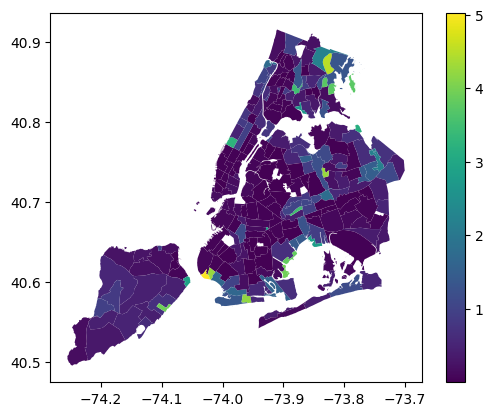

In [37]:
# plot park area percentage

merged_gdf.plot(column='park_area_perc', legend=True)

<Axes: >

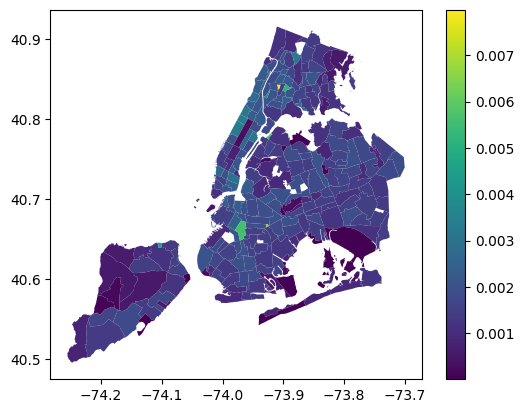

In [39]:
# plot tree count by area

merged_gdf.plot(column='trees_byArea', legend=True)

<Axes: >

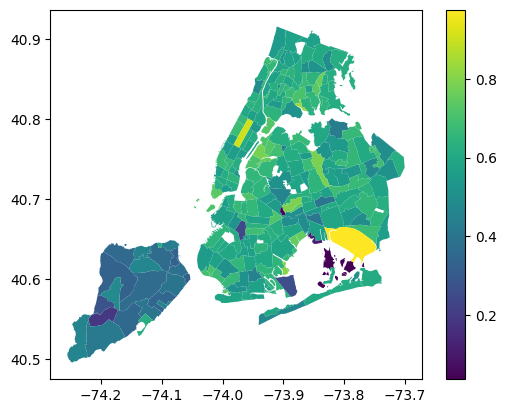

In [40]:
# plot percentage of trees in good condition

merged_gdf.plot(column='tp_good_perc', legend=True)

<Axes: >

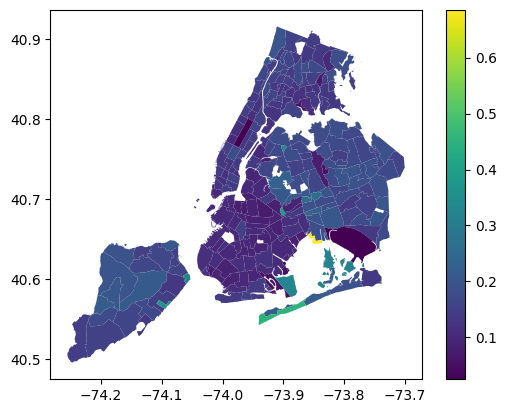

In [41]:
# plot percentage of trees in poor condition

merged_gdf.plot(column='tp_poor_perc', legend=True)

In [42]:
# descriptive statistics

merged_gdf.park_area_perc.describe()

count    245.000000
mean       0.621542
std        0.965744
min        0.000007
25%        0.036606
50%        0.215414
75%        0.845170
max        5.031396
Name: park_area_perc, dtype: float64

In [44]:
merged_gdf.trees_byArea.describe()

count    245.000000
mean       0.001610
std        0.000975
min        0.000002
25%        0.001160
50%        0.001542
75%        0.001899
max        0.007988
Name: trees_byArea, dtype: float64

In [45]:
merged_gdf.tp_good_perc.describe()

count    245.000000
mean       0.585001
std        0.119463
min        0.037838
25%        0.546799
50%        0.605446
75%        0.648873
max        0.975000
Name: tp_good_perc, dtype: float64

In [47]:
merged_gdf.tp_poor_perc.describe()

count    245.000000
mean       0.148005
std        0.063645
min        0.025000
25%        0.112676
50%        0.142633
75%        0.170819
max        0.685714
Name: tp_poor_perc, dtype: float64

### Correlation analysis

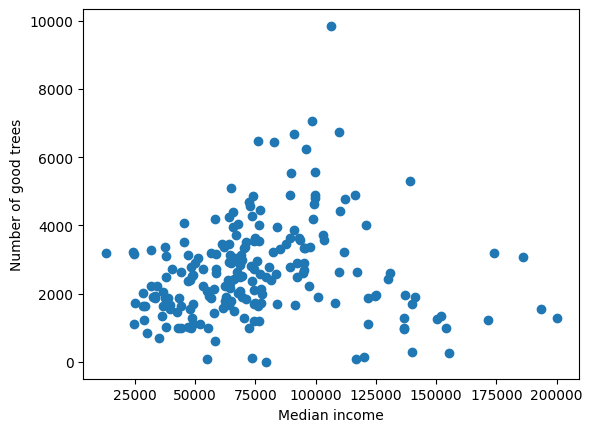

In [49]:
import matplotlib.pyplot as plt

plt.scatter(merged_gdf["MdHHIncE"], merged_gdf["good_trees"])
plt.xlabel("Median income")
plt.ylabel("Number of good trees")
plt.show()

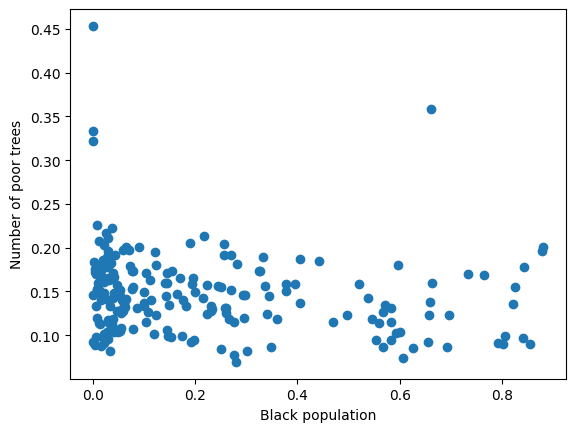

In [50]:
plt.scatter(merged_gdf["Black_perc"], merged_gdf["tp_poor_perc"])
plt.xlabel("Black population")
plt.ylabel("Number of poor trees")
plt.show()

In [51]:
merged_gdf.columns

Index(['geometry', 'GeoID', 'NTAName', 'Shape_Area', 'Pop_1E', 'MdHHIncE',
       'Hsp_perc', 'White_perc', 'Black_perc', 'Asian_perc', 'Disab_perc',
       'park_area', 'tree_count', 'trees_byArea', 'good_trees', 'poor_trees',
       'tp_good_perc', 'tp_poor_perc', 'park_area_perc', 'area_per_person'],
      dtype='object')

In [52]:
# subset for correlation analysis

gdf_subset = merged_gdf[['MdHHIncE', 'Hsp_perc', 'White_perc', 'Black_perc', 'Asian_perc',
       'Disab_perc', 'trees_byArea', 'tp_good_perc','tp_poor_perc', 'park_area_perc', 'area_per_person']]

# calculate correlation matrix

matrix = gdf_subset.corr(method = "spearman")
print(matrix)

                 MdHHIncE  Hsp_perc  White_perc  Black_perc  Asian_perc  \
MdHHIncE         1.000000 -0.532442    0.617522   -0.382777    0.319394   
Hsp_perc        -0.532442  1.000000   -0.537815    0.160180   -0.179185   
White_perc       0.617522 -0.537815    1.000000   -0.691579    0.291789   
Black_perc      -0.382777  0.160180   -0.691579    1.000000   -0.541856   
Asian_perc       0.319394 -0.179185    0.291789   -0.541856    1.000000   
Disab_perc      -0.585337  0.471587   -0.409406    0.372208   -0.349487   
trees_byArea    -0.037947  0.124215   -0.030719   -0.009737   -0.026474   
tp_good_perc    -0.100245  0.011124   -0.122318    0.160038   -0.070021   
tp_poor_perc     0.139347  0.182710   -0.017051   -0.201755    0.152321   
park_area_perc   0.041182  0.024415    0.105717   -0.010392   -0.069456   
area_per_person  0.105340 -0.069147    0.163281   -0.047462   -0.064958   

                 Disab_perc  trees_byArea  tp_good_perc  tp_poor_perc  \
MdHHIncE          -0.58533

In [53]:
corr = gdf_subset.corr(method = "spearman")
corr.style.background_gradient(cmap='coolwarm')

,MdHHIncE,Hsp_perc,White_perc,Black_perc,Asian_perc,Disab_perc,trees_byArea,tp_good_perc,tp_poor_perc,park_area_perc,area_per_person
MdHHIncE,1.000000,-0.532442,0.617522,-0.382777,0.319394,-0.585337,-0.037947,-0.100245,0.139347,0.041182,0.105340
Hsp_perc,-0.532442,1.000000,-0.537815,0.160180,-0.179185,0.471587,0.124215,0.011124,0.182710,0.024415,-0.069147
White_perc,0.617522,-0.537815,1.000000,-0.691579,0.291789,-0.409406,-0.030719,-0.122318,-0.017051,0.105717,0.163281
Black_perc,-0.382777,0.160180,-0.691579,1.000000,-0.541856,0.372208,-0.009737,0.160038,-0.201755,-0.010392,-0.047462
Asian_perc,0.319394,-0.179185,0.291789,-0.541856,1.000000,-0.349487,-0.026474,-0.070021,0.152321,-0.069456,-0.064958
Disab_perc,-0.585337,0.471587,-0.409406,0.372208,-0.349487,1.000000,0.047269,0.072985,0.012078,0.117279,0.098901
trees_byArea,-0.037947,0.124215,-0.030719,-0.009737,-0.026474,0.047269,1.000000,0.053359,-0.222907,-0.199596,-0.371342
tp_good_perc,-0.100245,0.011124,-0.122318,0.160038,-0.070021,0.072985,0.053359,1.000000,-0.446069,0.072583,-0.099032
tp_poor_perc,0.139347,0.182710,-0.017051,-0.201755,0.152321,0.012078,-0.222907,-0.446069,1.000000,0.099805,0.308968
park_area_perc,0.041182,0.024415,0.105717,-0.010392,-0.069456,0.117279,-0.199596,0.072583,0.099805,1.000000,0.938252


In [54]:
# print pairs of variables in ascending order of their correlation rank

gdf_subset.corr(method = "spearman").unstack().sort_values().drop_duplicates()

Black_perc       White_perc        -0.691579
Disab_perc       MdHHIncE          -0.585337
Asian_perc       Black_perc        -0.541856
White_perc       Hsp_perc          -0.537815
MdHHIncE         Hsp_perc          -0.532442
tp_good_perc     tp_poor_perc      -0.446069
White_perc       Disab_perc        -0.409406
Black_perc       MdHHIncE          -0.382777
area_per_person  trees_byArea      -0.371342
Disab_perc       Asian_perc        -0.349487
trees_byArea     tp_poor_perc      -0.222907
Black_perc       tp_poor_perc      -0.201755
trees_byArea     park_area_perc    -0.199596
Asian_perc       Hsp_perc          -0.179185
tp_good_perc     White_perc        -0.122318
MdHHIncE         tp_good_perc      -0.100245
area_per_person  tp_good_perc      -0.099032
tp_good_perc     Asian_perc        -0.070021
park_area_perc   Asian_perc        -0.069456
area_per_person  Hsp_perc          -0.069147
Asian_perc       area_per_person   -0.064958
Black_perc       area_per_person   -0.047462
trees_byAr

## Results & Discussion
Due to the limitations related to data granularity and accuracy as described previously, the results of this research project do not reveal any correlation between socio-economic factors and the spatial distribution of green spaces in NYC. The Spearman rank correlation matrix shows correlation among the socio-economic variables themselves, notably the positive correlation between percentage of white population and median income, or between the percentage of Black or Hispanic minorities and rates of disability. There are also notable negative correlation results for ethnic minority population percentage and median income. There are, however, no statistically significant correlation results for the newly calculated variables on green space distribution, except the autocorrelation between park area percentage and park area per person due to the fact that these two variables capture similar phenomena. The maps of the three variables have to be interpreted cautiously due to the limitations of the data used, however, they still reveal a broad pattern of green space distribution and quality within the city. In broad terms, they demonstrate that quality of urban green spaces is better in Brooklyn and Manhattan in terms of percentage area per neighbourhood, tree count and tree condition, whereas for example Staten Island tends to perform more poorly for these variables.
 
Studying inequalities in urban green space distribution and the underlying factors leading to this has implications for informing city planning and policy making, especially as the provision of green spaces is becoming increasingly relevant in the context of combatting climate and biodiversity crises as well as urban heat island effect. However, as Jung (2023) points out, care needs to be taken to ensure that improving access to green spaces in deprived neighbourhoods does not come at the cost of displacement of low-income residents not being able to keep up with rising real estate prices as the attractiveness of the neighbourhood increases. To avoid this, he stresses the importance of proactive interventions implemented alongside green space provision, such as housing subsidisation, rent stabilisation or rent-control programs.


## Conclusion
Despite not having statistically confirmed the initial hypothesis about uneven distribution of green spaces, this research project nonetheless shed light on some of the complexities involved in researching green space access and distribution and highlighted the importance of collection of accurate and reliable data on this topic, both quantitative and qualitative, especially in big cities such as NYC. Such data is vital for city planning and policy making, especially in terms of efficient resource allocation to neighbourhoods that need it the most, while also keeping in mind the broader socio-economic context and particularities of different neighbourhoods.


## References

Geary, R.S. et al. (2023) ‘Ambient greenness, access to local green spaces, and subsequent mental health: a 10-year longitudinal dynamic panel study of 2·3 million adults in Wales’, The Lancet Planetary Health, 7(10), pp. e809–e818. Available at: https://doi.org/10.1016/S2542-5196(23)00212-7  

Jung, E. (2023) ‘Green spaces for whom? A latent profile analysis of park-rich or -deprived neighborhoods in New York City’, Landscape and Urban Planning, 237(December 2021), p. 104806. Available at: https://doi.org/10.1016/j.landurbplan.2023.10480  
.
Mustafa, A. et al. (2023) ‘Perceived and geographic access to urban green spaces in New York City during COVID-19’, Cities, 143(September), p. 104572. Available at: https://doi.org/10.1016/j.cities.2023.1045  7
2.
Phillips, A. et al. (2023) ‘Integrating public perceptions of proximity and quality in the modelling of urban green space access’, Landscape and Urban Planning, 240(September), p. 104875. Available at: https://doi.org/10.1016/j.landurbplan.2023.104875.

